# (E3) 카메라 스티커 앱 만들기

필요한 패키지 임포트

In [1]:
import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

이미지 리사이즈 및 저장

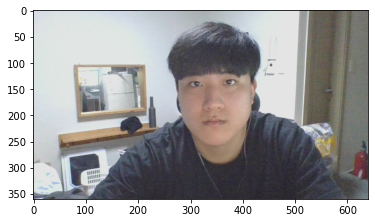

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

hog detector로 얼굴 바운더리 찾고 box 추출

rectangles[[(270, 98) (425, 253)]]
68


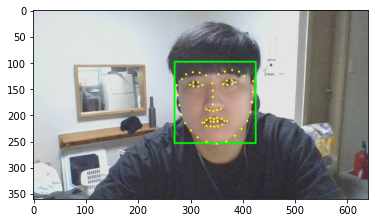

In [3]:
detector_hog = dlib.get_frontal_face_detector() 
dlib_rects = detector_hog(img_show, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

스티커 위치선정

In [4]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
refined_x = x - w//2 
refined_y = y - h//2
print ('(rx,ry) : (%d,%d)'%(refined_x, refined_y))



(343, 179)
(x,y) : (343,179)
(w,h) : (156,156)
(rx,ry) : (265,101)


스티커 이미지 불러오기

(156, 156, 3)
(360, 640, 3)
[255 255 255]


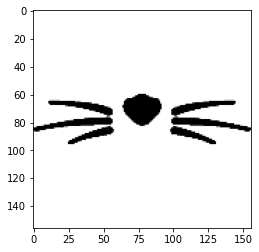

In [5]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
print (img_show.shape)
plt.imshow(img_sticker)
plt.show
print(img_sticker[0][0])

(360, 640, 3) (156, 156, 3) (156, 156, 3)


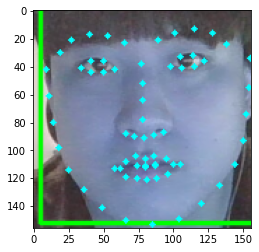

In [6]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(img_show.shape,sticker_area.shape,img_sticker.shape)
plt.imshow(img_show)
plt.imshow(sticker_area)
plt.show
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

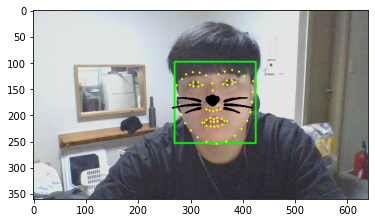

In [7]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

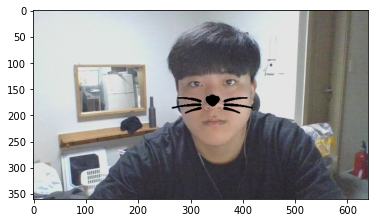

In [8]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 추가 
얼굴 이미지 각도 다양화
위 과정 한셀로 통합

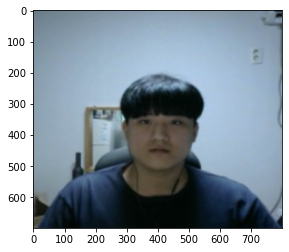

rectangles[[(304, 325) (489, 511)]]
68
(405, 406)
(x,y) : (405,406)
(w,h) : (186,186)
(rx,ry) : (312,313)
(186, 186, 3)
(700, 800, 3)
[255 255 255]
(700, 800, 3) (186, 186, 3) (186, 186, 3)


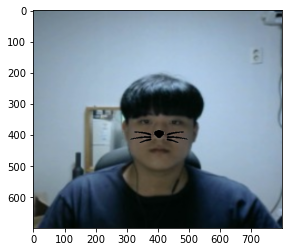

In [9]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/6.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (800, 700))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector() 
dlib_rects = detector_hog(img_show, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

    
refined_x = x - w//2 
refined_y = y - h//2
print ('(rx,ry) : (%d,%d)'%(refined_x, refined_y))

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
print (img_show.shape)
plt.imshow(img_sticker)
plt.show
print(img_sticker[0][0])

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(img_show.shape,sticker_area.shape,img_sticker.shape)
plt.imshow(img_show)
plt.imshow(sticker_area)
plt.show
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

이전에 했던 가위바위보 인식기에서 이미지를 얻기위해 이용했던 티쳐블머신 사이트에서 사진 데이터를 얻었다 정면 사선 왼쪽 오른쪽을 얻었다.  
하지만 리사이즈를 이전이랑 똑같이 하면 얼굴인식을 못한다. 리사이즈 비율을 최대한 원래 이미지와 비슷하게 하여 해결하였다.  
각도에 따라 얼굴이 인식이 안되는 경우가 생겼다. 아래와 같이 인식을 못해 이후가 진행이 안되었다. 


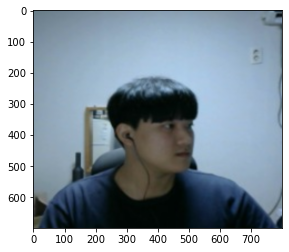

rectangles[]


In [10]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/1.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (800, 700))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector() 
dlib_rects = detector_hog(img_show, 1)

print(dlib_rects)


dlib에서 추가적으로 CNN을 이용하여 얼굴을 인식하는 방법도 있기에 그방법을 생각해 보았다. 이것도 인식이 안되면 dlib이외의 방법을 생각해봐야겠다.

읽어들인 이미지


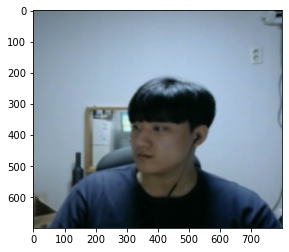

hog_detector으로 인식한 얼굴 박스좌표 없으면 rectagules[]으로표현
rectangles[]
cnn_detector으로 인식한 얼굴 박스좌표 없으면 mmod_rectangles[]으로표현
mmod_rectangles[[(284, 295) (488, 499)]]
hog 방식으로 검출되지 않음


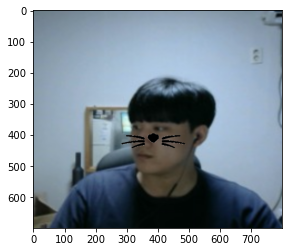

In [35]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/5.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (800, 700))# 640x360의 크기로 Resize
img_bgr_c = img_bgr.copy()
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show_h = img_show
img_show_c = img_bgr.copy()
cnn_weights = os.getenv('HOME')+'/aiffel/camera_sticker/models/mmod_human_face_detector.dat'

# !python ap.py -i img_show_c -w cnn_weights
print('읽어들인 이미지')
plt.imshow(img_rgb)
plt.show()


detector_hog = dlib.get_frontal_face_detector() 
cnn_face_detector = dlib.cnn_face_detection_model_v1(cnn_weights)
dlib_rects = detector_hog(img_show_h, 1)
cnn_rects = cnn_face_detector(img_show_c,1)

print("hog_detector으로 인식한 얼굴 박스좌표 없으면 rectagules[]으로표현")
print(str(dlib_rects))
print('cnn_detector으로 인식한 얼굴 박스좌표 없으면 mmod_rectangles[]으로표현')
print(cnn_rects)


if str(dlib_rects) != "rectangles[]":
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)

    list_landmarks = []
#     print(len(list_landmarks[0]))

    
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)



    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        print (landmark[30]) # nose center index : 30
        x = landmark[30][0]
        y = landmark[30][1]
        w = dlib_rect.width()
        h = dlib_rect.width()
        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))

    
    refined_x = x - w//2 
    refined_y = y - h//2
    print ('(rx,ry) : (%d,%d)'%(refined_x, refined_y))

    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))
    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
#     print(img_show.shape,sticker_area.shape,img_sticker.shape)
#     plt.imshow(img_show)
#     plt.imshow(sticker_area)
#     plt.show()
#     img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#         np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show() 
else:
    print('hog 방식으로 검출되지 않음')
    
    
if str(cnn_rects) != "mmod_rectangles[]": 
    for cnn_rect in cnn_rects:
        ll = cnn_rect.rect.left()
        tt = cnn_rect.rect.top()
        rr = cnn_rect.rect.right()
        bb = cnn_rect.rect.bottom()

        cv2.rectangle(img_show_c, (ll,tt), (rr,bb), (0,0,255), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show_c, cv2.COLOR_BGR2RGB)
    model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)

    
    for cnn in cnn_rects:
        points = landmark_predictor(img_rgb, cnn.rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)



    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            cv2.circle(img_show_c, point, 2, (255, 255, 0), -1) # yellow

    img_show_rgb_c = cv2.cvtColor(img_show_c, cv2.COLOR_BGR2RGB)

    for cnn, landmark in zip(cnn_rects, list_landmarks):
#         print (landmark[30]) # nose center index : 30
        x_c = landmark[31][0]
        y_c = landmark[31][1]
        w_c = cnn.rect.width()
        h_c = cnn.rect.width()
#         print ('(x,y) : (%d,%d)'%(x_c,y_c))
#         print ('(w,h) : (%d,%d)'%(w_c,h_c))

    
    refined_x_c = x_c - w_c//2 
    refined_y_c = y_c - h_c//2
#     print ('(rx,ry) : (%d,%d)'%(refined_x_c, refined_y_c))

    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
    img_sticker_c = cv2.imread(sticker_path)
    img_sticker_c = cv2.resize(img_sticker_c, (w_c,h_c))    
    
    sticker_area_c = img_show_c[refined_y_c:refined_y_c+img_sticker_c.shape[0],\
                                refined_x_c:refined_x_c+img_sticker_c.shape[1]]
#     print(img_show_c.shape,sticker_area_c.shape,img_sticker_c.shape)
    img_show_c[refined_y_c:refined_y_c+img_sticker_c.shape[0], refined_x_c:refined_x_c+img_sticker_c.shape[1]] = \
        np.where(img_sticker_c==255,sticker_area_c,img_sticker_c).astype(np.uint8)
#     plt.imshow(img_show_c)
#     plt.imshow(sticker_area_c)
#     plt.show()
    sticker_area_c = img_bgr_c[refined_y_c:refined_y_c+img_sticker_c.shape[0], refined_x_c:refined_x_c+img_sticker_c.shape[1]]
    img_bgr_c[refined_y_c:refined_y_c+img_sticker_c.shape[0], refined_x_c:refined_x_c+img_sticker_c.shape[1]] = \
        np.where(img_sticker_c==255,sticker_area_c,img_sticker_c).astype(np.uint8)
    plt.imshow(cv2.cvtColor(img_bgr_c, cv2.COLOR_BGR2RGB))
    plt.show()
    
    
if str(dlib_rects) == 'rectangles[]':
    if str(cnn_rects) == 'mmod_rectangles[]': 
        print('이 이미지는 dlib에 있는 모델로 얼굴인식이 안됩니다')
    



## 고찰
왕관을 했을 때와 다르게 이미지 덮어씌우는 작업에서 검은색일때 대체안하는것에서 고양이털은 흰색일때 대체안하는것으로 바꿔줬다. 위치선정은 고양이 이미지를 보았을 때 이미지를 삼등분했을때 중간에 수염이 자리하고 있어서 리사이즈를 왕관처럼 한다면 약간 찌그러지는 현상이 있어 그대로 유지하며 코와 코가 일치하도록 landmark[30]를 기준으로 하였다.
### 각도에 따른 다양한 방법 모색  
dlib에 cnn방식으로 얼굴인식하는 방법이 있다하여 cnn방식을 조사하였다.
괜히 cnn방식을 해보겠다고 생각했나 싶을 정도로 에러가 많이 났다.  
일단 cnn이 hog를 사용할 때와 다르게 모델값에 weight를 넣어줘야했다. 일단 cnn이 hog를 사용할 때와 다르게 모델값에 weight를 넣어줘야했다. 
처음에 찾아본 사이트에서는 argparse를 이용했지만 주피터에서 오류가 났다.  
오류 해결법으로 따로 .py를 만들어 그걸 불러오는 방법도 해봤지만 안됬다. 그리고나서 처음에 모델에 dat파일을 넣어봤는데 안됬다가 진짜 이것저것 건들다가 되었다. 이게 왜 되는가를 이해하지 못해 코드를 수정하기 두려워졌다.  
이제 시작하며 얼굴 각도가 정면이 아니어도 cnn으로 잘 인식하는것을 확인하였다. 하지만 hog가 인식을 못하면 실행이 안되어 if문으로 인식하지 못하였을때의 값이 아니면 실행하도록 만들었다.  
마지막 문제점으로 정면일때는 고양이 수염이 잘 위치해있는 프로그램이지만 수염의 위치가 박스의 중앙위치로 잡혀있어 코로 움직여주어야했고 움직인다하더라도 스티커이미지의 축회전이 없는이상 이상하게 보이는건 마찬가지라 축회전을 시킬수 있는 방안을 찾아야 한다는 것을 끝으로 마무리 지었다.
#### 추가로 얻은 점
jupyter notebook에서 workplace에 있는 파이썬 파일을 실행 시킬 수 있다는 것을 추가로 얻었다.아쉽게도 실행이 된다는 것만 얻었고 그걸 이용해보지는 못했다. arparse라는 패키지를 알게 되었는데 대충 이해한 것으로는 설명이나 등등 넣는데 좋은 도구인것같다. 나중에 더 알아보려고 한다.
#### 아쉬운 점
사진의 명도에 따른 프로그램을 시도하지 못했던 것이 아쉽다. 상상으로 해보자면 명도가 밝든 적든 상관없이 잘될것같다 hog가 밝기의 변화를 이용한것으로 알고 있는데 밝기의 변화는 밝기의 세기와는 별개로 작용하기 때문에 라는 추측을 해본다.  
이외에 분명히 처음에 모델에 weight를 잘 넣고 했는데 오류가 나서 이렇게 하면 안되는거구나 하고 시도한 방법이 arparse인데 이것을 처음보는 상태여서 익히는데 너무 많은 시간이 소요된점이 아쉽다.
